# GARCH Stock Forecasting

## Read Data

In [88]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## DIS Volatility

In [ ]:
start = datetime(2015, 1, 1)
end = datetime.today()

In [ ]:
dis = web.DataReader('DIS', 'stooq', start=start, end=end)

In [ ]:
returns = 100 * dis.Close.pct_change().dropna()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

In [ ]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [ ]:
model = arch_model(returns, p=3, q=3)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

## Try GARCH(3,0) = ARCH(3)

In [ ]:
model = arch_model(returns, p=3, q=0)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [44]:
start = datetime(2000, 1, 1)
end = datetime(2025,6,20)

In [45]:
spy = web.DataReader('SPY', 'stooq', start=start, end=end)

In [46]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

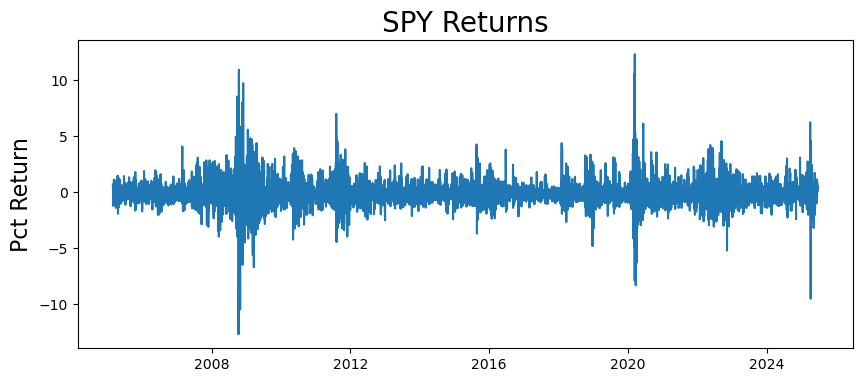

In [47]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

In [48]:
# Rolling 22-day volatility (not annualized)
volatility = returns.rolling(window=22).std().dropna()

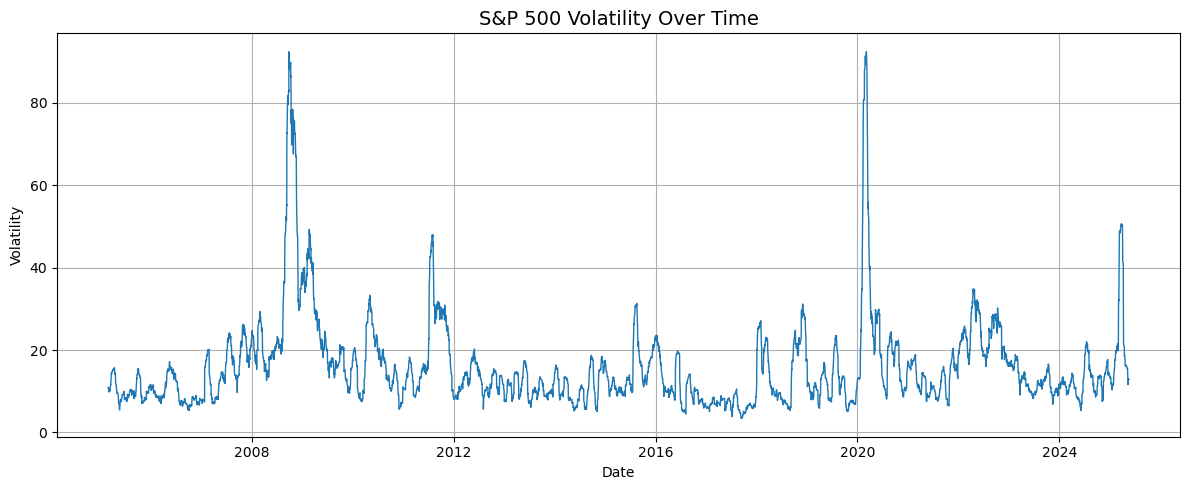

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(volatility*math.sqrt(252), linewidth=1)
plt.title('S&P 500 Volatility Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

## PACF

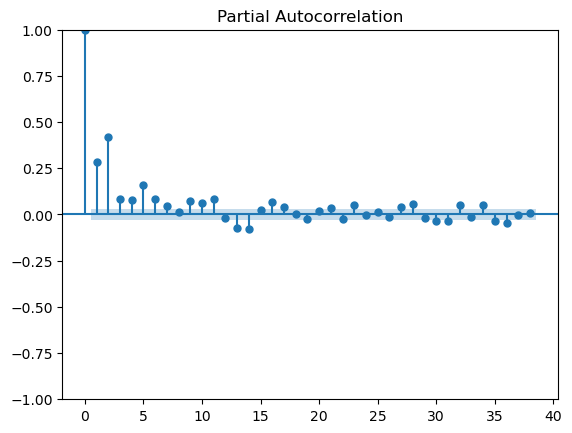

In [50]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [51]:
model = arch_model(returns, p=2, q=2)

In [52]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 50990.488406904595
Iteration:      2,   Func. Count:     21,   Neg. LLF: 8280958.507157184
Iteration:      3,   Func. Count:     30,   Neg. LLF: 8196.205410918834
Iteration:      4,   Func. Count:     39,   Neg. LLF: 11745.58417319816
Iteration:      5,   Func. Count:     49,   Neg. LLF: 8969.833729629405
Iteration:      6,   Func. Count:     58,   Neg. LLF: 6819.251471118601
Iteration:      7,   Func. Count:     66,   Neg. LLF: 6857.3563798727355
Iteration:      8,   Func. Count:     74,   Neg. LLF: 6801.769274416505
Iteration:      9,   Func. Count:     81,   Neg. LLF: 6831.080440029871
Iteration:     10,   Func. Count:     89,   Neg. LLF: 6801.979105460978
Iteration:     11,   Func. Count:     97,   Neg. LLF: 6801.197102739178
Iteration:     12,   Func. Count:    104,   Neg. LLF: 6801.194768111611
Iteration:     13,   Func. Count:    111,   Neg. LLF: 6801.194687963531
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6801.194

In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6801.19
Distribution:                  Normal   AIC:                           13614.4
Method:            Maximum Likelihood   BIC:                           13653.6
                                        No. Observations:                 5110
Date:                Sat, Jun 21 2025   Df Residuals:                     5109
Time:                        18:31:55   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.0807  1.036e-02     -7.785  6.993e-15 [ -0.101,-6.036e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  7.823e-03      3.776  1.596e-04 [1.421e-02,4.487e-02]
alpha[1]       0.0674  2.253e-02      2.992  2.771e-03   [2.326e-02,  0.112]
alpha[2]       0.1145  3.660e-02      3.128  1.758e-03   [4.277e-02,  0.186]
beta[1]        0.8016      0.238      3.374  7.404e-04     [  0.336,  1.267]
beta[2]    6.5216e-17      0.199  3.278e-16      1.000     [ -0.390,  0.390]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [54]:
print(len(returns))
print(len(volatility))


5110
5089


In [72]:
rolling_predictions = []
test_size = len(volatility) - 1

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [73]:
# # Keep the last 5 years of returns (from ~2018 to 2025)
# returns_recent = returns[returns.index >= '2020-01-01']
# test_size = len(returns_recent)

# rolling_predictions = []

# for i in range(test_size):
#     train = returns.iloc[:-(test_size - i)]
#     model = arch_model(train, p=2, q=2)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1)
#     rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

In [74]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-(test_size):])
# rolling_predictions = pd.Series(rolling_predictions, index=returns_recent.index)


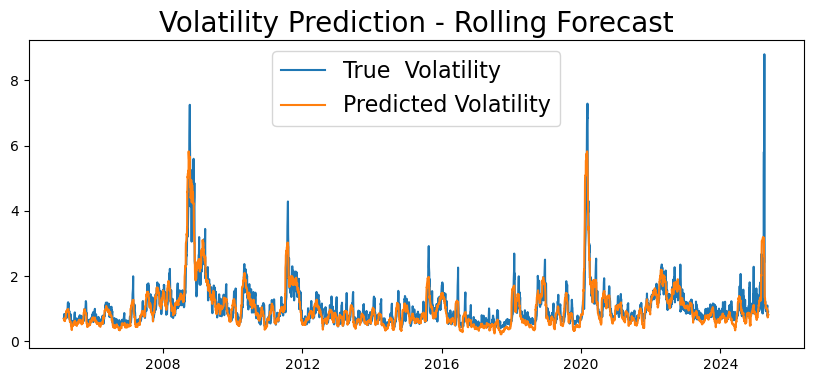

In [87]:
plt.figure(figsize=(10,4))
preds, = plt.plot(rolling_predictions)
true, = plt.plot(volatility)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True  Volatility', 'Predicted Volatility'], fontsize=16)

# # Plot
# plt.figure(figsize=(12, 5))
# plt.plot(returns_recent, label='True Returns')
# plt.plot(rolling_predictions, label='Predicted Volatility')
# plt.title('Volatility Prediction (2018–2025)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# How to use the model

In [76]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [77]:
pred = model_fit.forecast(horizon=8)
future_dates = [returns.index[-len(volatility)] + timedelta(days=i) for i in range(1,9)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

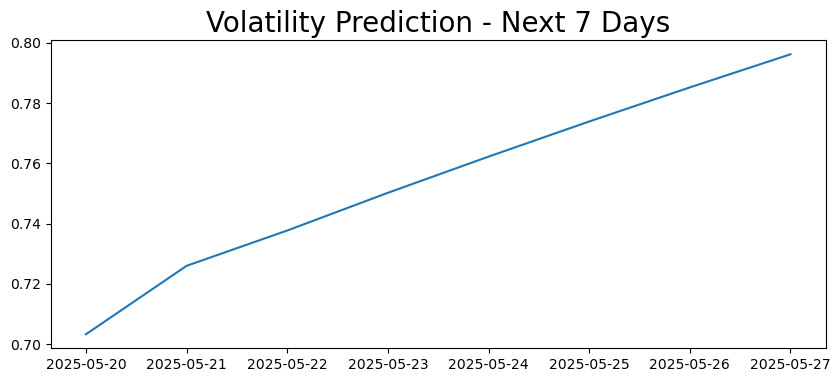

In [78]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

# LSTM-GARCH model.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


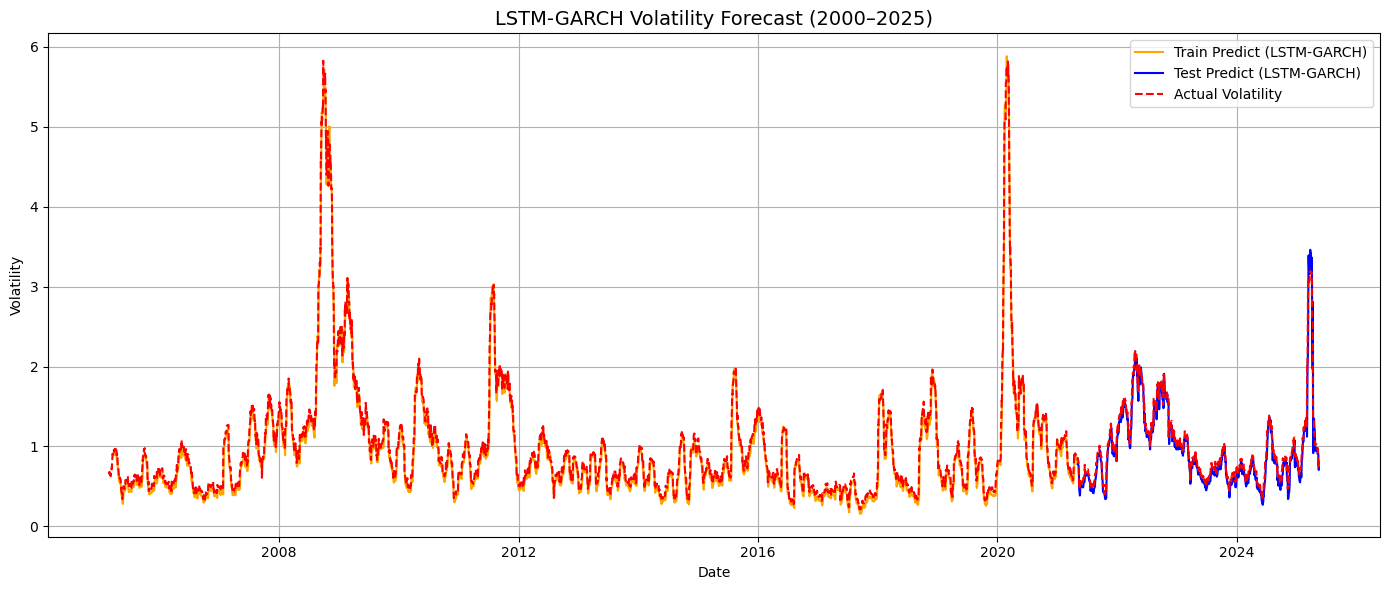

In [ ]:
# === Step 1: Merge input data ===
# Assumes returns, volatility, predicted_vol already defined for 2000–2024
hybrid_df = pd.concat([
    returns.rename("log_return"),
    volatility.shift(1).rename("lagged_vol"),
    rolling_predictions.rename("garch_forecast"),
    volatility.rename("target_vol")
], axis=1).dropna()

# === Step 2: Normalize data ===
scaler = MinMaxScaler()
scaled = scaler.fit_transform(hybrid_df)

# === Step 3: Create dataset ===
def create_dataset(data, look_back=20):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back, 1])  # column 1 = lagged_vol (target_vol)
    return np.array(X), np.array(y)

look_back = 20
X, y = create_dataset(scaled, look_back)

# === Step 4: Split into train/test ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === Step 5: Reshape input ===
X_train = X_train.reshape(X_train.shape[0], look_back, X.shape[2])
X_test = X_test.reshape(X_test.shape[0], look_back, X.shape[2])

# === Step 6: Build and train LSTM ===
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# === Step 7: Predict and inverse scale ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

scaler_y = MinMaxScaler()
scaler_y.min_, scaler_y.scale_ = scaler.min_[1], scaler.scale_[1]
train_pred_inv = scaler_y.inverse_transform(y_train_pred)
test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_train_inv = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# === Step 8: Rebuild full timeline ===
full_index = hybrid_df.index[look_back + 1:]
train_pred_series = pd.Series(train_pred_inv.flatten(), index=full_index[:split])
test_pred_series = pd.Series(test_pred_inv.flatten(), index=full_index[split:])


# === Step 9: Plot — Train + Test Combined ===
plt.figure(figsize=(14, 6))
plt.plot(train_pred_series, label='Train Predict (LSTM-GARCH)', color='orange')
plt.plot(test_pred_series, label='Test Predict (LSTM-GARCH)', color='blue')
plt.plot(volatility, label='Actual Volatility', linestyle='--', color='red')
plt.title('LSTM-GARCH Volatility Forecast (2000–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

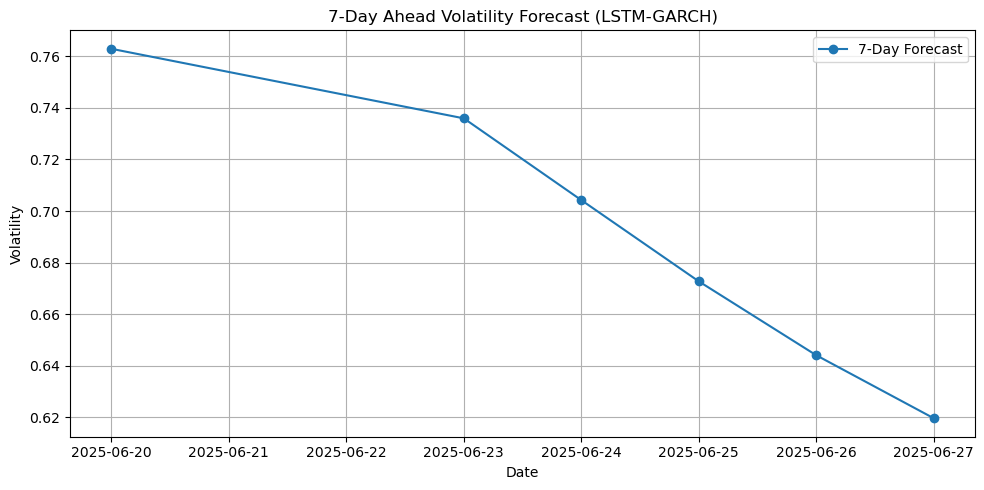

2025-06-20    0.762867
2025-06-23    0.735915
2025-06-24    0.704225
2025-06-25    0.672746
2025-06-26    0.644107
2025-06-27    0.619690
Freq: B, dtype: float32


In [86]:
# === STEP 1: Get last input sequence from your full dataset ===
last_seq = scaled[-look_back:]
input_seq = last_seq.copy()
future_scaled = []

# === STEP 2: Forecast next 7 steps using trained model ===
for _ in range(6):
    pred = model.predict(input_seq.reshape(1, look_back, X.shape[2]), verbose=0)
    future_scaled.append(pred[0, 0])

    # Prepare next input by shifting and inserting prediction
    next_step = input_seq[-1].copy()
    next_step[1] = pred[0, 0]  # update lagged_vol
    input_seq = np.append(input_seq[1:], [next_step], axis=0)

# === STEP 3: Inverse transform forecast ===
scaler_y = MinMaxScaler()
scaler_y.min_, scaler_y.scale_ = scaler.min_[3], scaler.scale_[3]  # column 3 = target_vol
forecast = scaler_y.inverse_transform(np.array(future_scaled).reshape(-1, 1)).flatten()

# === STEP 4: Create future index ===
last_date = hybrid_df.index[-1]
forecast_dates = pd.bdate_range(start='2025-06-20', periods=6)
forecast_series = pd.Series(forecast, index=forecast_dates)

# === STEP 5: Plot forecast ===
plt.figure(figsize=(10, 5))
plt.plot(forecast_series, marker='o', label='7-Day Forecast')
plt.title('7-Day Ahead Volatility Forecast (LSTM-GARCH)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print forecast
print(forecast_series)